In [217]:
import dal, pandas, common
dal.init_db()
common.PERIODS_IN_HOUR = 4*60
common.PERIODS_IN_DAY = common.PERIODS_IN_HOUR * 24
from scipy.stats import multivariate_normal
from sklearn import model_selection
import seaborn as sns
import matplotlib.pyplot as plt

In [218]:
%matplotlib inline

In [219]:
in_df =pandas.DataFrame.from_csv("csv/in9-10.csv")
out_df =pandas.DataFrame.from_csv("csv/out9-10.csv")



In [223]:
def remove_useless_cols(df):
    del df["Well Known Port"]
    del df["egressinterface"]
    del df["ingressinterface"]
    del df["ipclassofservice"]
    del df["packetdeltacount"]
    del df["samplingpopulation"]
    del df["samplingsize"]
        
def rename_cols(df):
    df.columns = ['dest_ip', 'dest_port', 'timestamp', 'bandwidth', 'protocol', 'src_ip', 'src_port']    

In [224]:
remove_useless_cols(in_df)
remove_useless_cols(out_df)
rename_cols(in_df)
rename_cols(out_df)


In [229]:
in_df['bandwidth'].value_counts()

768000    38540
20480     17140
742400     5316
752640     4066
26624      2850
55808      2755
665600     1980
66560      1351
753664      989
735232      689
36352       467
58368       447
44032       441
716800      416
64000       341
41984       326
39936       322
37376       320
30720       284
123904      207
81408       204
641024      200
60928       183
498176      153
662016      153
96768       149
67072       143
115712      143
37888       135
521728      134
          ...  
732672        1
320000        1
502784        1
655360        1
658944        1
569856        1
455680        1
510464        1
627200        1
664064        1
398336        1
577536        1
253440        1
526336        1
667136        1
710144        1
482816        1
570880        1
392192        1
419328        1
463872        1
598528        1
606208        1
226816        1
447488        1
347648        1
434688        1
392704        1
311808        1
349184        1
Name: bandwidth, dtype: 

In [216]:
sum_bytes = pandas.DataFrame(out_df.groupby(['dest_ip', 'dest_port', 'protocol', 'src_ip', 'src_port'])['bandwidth'].sum())
# sum_bytes

# sns.distplot(sum_bytes['bytes_delta'].apply(lambda x: my_log))

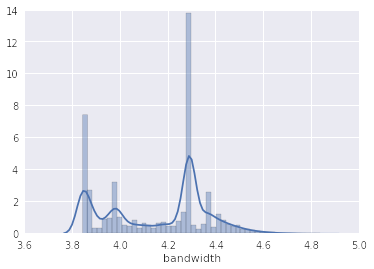

In [200]:
in_sum_bytes = pandas.DataFrame(in_df.groupby(['dest_ip', 'dest_port', 'protocol', 'src_ip', 'src_port'])['bandwidth'].sum())
sns.distplot(in_sum_bytes['bandwidth'].apply(lambda x: my_log(x)))

In [123]:
min_time = pandas.DataFrame(df.groupby(['dest_ip', 'dest_port', 'protocol', 'src_ip', 'src_port'])['timestamp'].min())
max_time = pandas.DataFrame(df.groupby(['dest_ip', 'dest_port', 'protocol', 'src_ip', 'src_port'])['timestamp'].max())

In [124]:
duration = max_time['timestamp'] - min_time['timestamp'] 


In [136]:
def calc_prob(row, model):
    return  model.pdf((row['duration'], row['bandwidth']))

def my_log(x):
    if isinstance(x, (int, long, float, complex)):
        return common.safe_log(common.safe_log(x))
    else:
        return x

def get_script_data(data):
    bots_ips = ['10.0.0.2','10.0.0.21','10.0.0.6','10.0.0.14','10.0.0.3', '88.198.23.221', '10.0.0.20', '10.0.0.12', '10.0.0.11',  '10.0.0.23', '10.0.0.18',  '10.0.0.24', '10.0.0.105',  '10.0.0.5', '10.0.0.104']
    return data[(data['dest_ip'].isin(bots_ips) | data['src_ip'].isin(bots_ips))]

def get_human_data(data):
    bots_ips = ['10.0.0.2','10.0.0.21','10.0.0.6','10.0.0.14','10.0.0.3', '88.198.23.221', '10.0.0.20', '10.0.0.12', '10.0.0.11',  '10.0.0.23', '10.0.0.18',  '10.0.0.24', '10.0.0.105',  '10.0.0.5', '10.0.0.104']
    return data[(data['dest_ip'].isin(bots_ips) | data['src_ip'].isin(bots_ips)) == False]

def create_model(data):
    return multivariate_normal(mean = data[['sessions_bandwidths', 'sessions_durations']].mean(), cov=data[['sessions_bandwidths', 'sessions_durations']].cov())

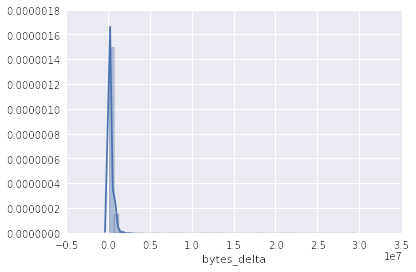

In [141]:
sns.distplot(sum_bytes['bytes_delta'])

In [ ]:


data = pandas.DataFrame()
data['bandwidth'] = df['n_bytes']
data['duration'] = df['timestamp'] - df['start_time']
data['dest_ip'] = df['dest_ip']
data['src_ip'] = df['src_ip']

In [5]:
def calc_prob(row, model):
    return  model.pdf((row['duration'], row['bandwidth']))

def my_log(x):
    if isinstance(x, (int, long, float, complex)):
        return common.safe_log(common.safe_log(x))
    else:
        return x

def get_script_data(data):
    bots_ips = ['10.0.0.2','10.0.0.21','10.0.0.6','10.0.0.14','10.0.0.3', '88.198.23.221', '10.0.0.20', '10.0.0.12', '10.0.0.11',  '10.0.0.23', '10.0.0.18',  '10.0.0.24', '10.0.0.105',  '10.0.0.5', '10.0.0.104']
    return data[(data['dest_ip'].isin(bots_ips) | data['src_ip'].isin(bots_ips))]

def get_human_data(data):
    bots_ips = ['10.0.0.2','10.0.0.21','10.0.0.6','10.0.0.14','10.0.0.3', '88.198.23.221', '10.0.0.20', '10.0.0.12', '10.0.0.11',  '10.0.0.23', '10.0.0.18',  '10.0.0.24', '10.0.0.105',  '10.0.0.5', '10.0.0.104']
    return data[(data['dest_ip'].isin(bots_ips) | data['src_ip'].isin(bots_ips)) == False]

def create_model(data):
    return multivariate_normal(mean = data[['sessions_bandwidths', 'sessions_durations']].mean(), cov=data[['sessions_bandwidths', 'sessions_durations']].cov())

In [6]:
s_data = get_script_data(data)
h_data = get_human_data(data)

In [7]:
logged_s_data = s_data.applymap(lambda x: my_log(x))
logged_h_data = h_data.applymap(lambda x: my_log(x))

In [8]:
s_model = multivariate_normal(mean = logged_s_data[['bandwidth', 'duration']].mean(), cov=logged_s_data[['bandwidth', 'duration']].cov())
h_model = multivariate_normal(mean = logged_h_data[['bandwidth', 'duration']].mean(), cov=logged_h_data[['bandwidth', 'duration']].cov())

In [14]:
logged_s_data['prob'] = logged_s_data.apply(calc_prob, args=(s_model,), axis=1)
logged_h_data['prob'] = logged_h_data.apply(calc_prob, args=(h_model,), axis=1)

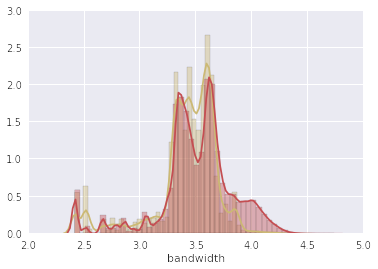

In [22]:
sns.set_color_codes()
sns.distplot(logged_h_data['bandwidth'], color='y', label="human")
sns.distplot(logged_s_data['bandwidth'], color='r', label="script")


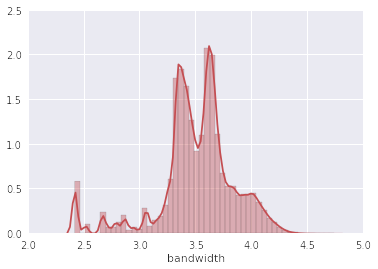

In [21]:
sns.distplot(logged_s_data['bandwidth'], color='r', label="script")

In [28]:
ingoing_s_data = logged_s_data[logged_s_data['dest_ip'].str.match('10.0.*')]
outgoing_s_data = logged_s_data[logged_s_data['src_ip'].str.match('10.0.*')]

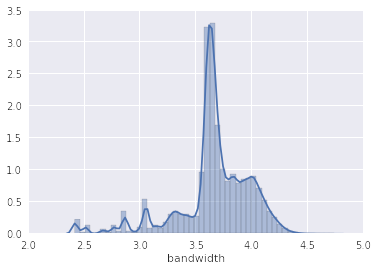

In [29]:
sns.distplot(ingoing_s_data['bandwidth'], color='b', label="script")

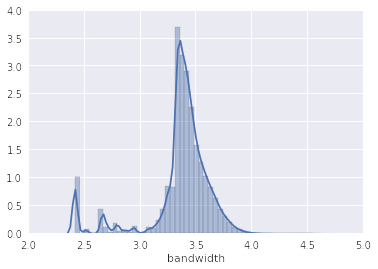

In [30]:
sns.distplot(outgoing_s_data['bandwidth'], color='b', label="script")